# FINAL PROJECT - FIT3139
## Dinh Nguyen - 33448388

#### Import required libraries

In [ ]:
!pip install nashpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Eq, solve
from sympy import Matrix
import nashpy as nash

## Deterministic Lotka-Volterra Model

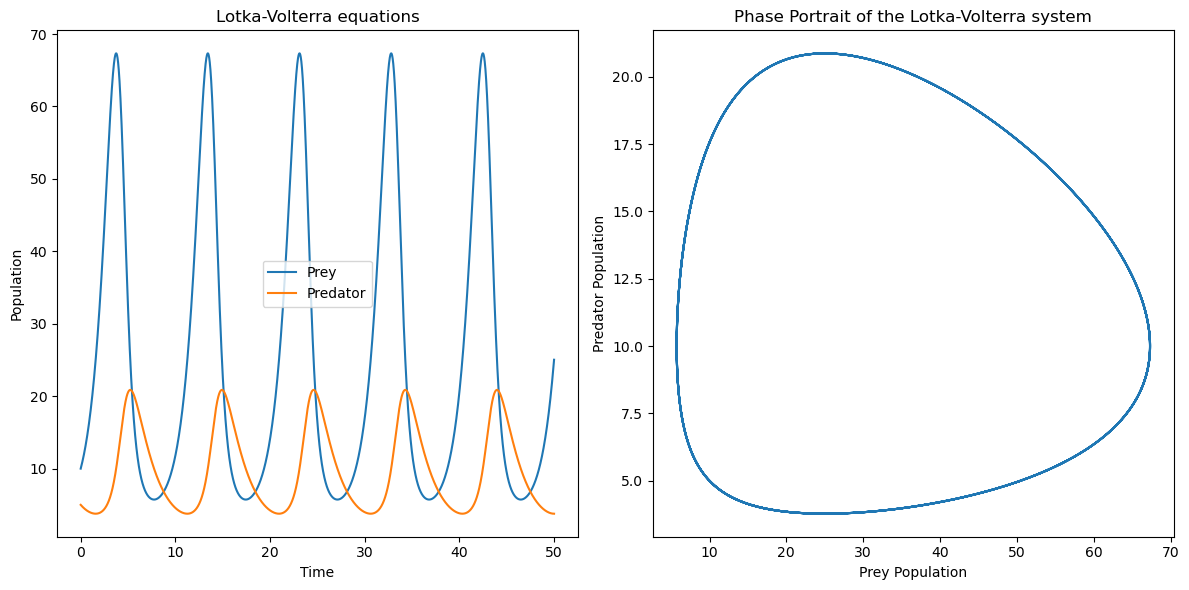

In [185]:
# Parameters
alpha = 1.0
beta = 0.1
gamma = 0.5
delta = 0.02

# Lotka Volterra equations
def base_lotka_volterra(state, t):
    x, y = state  # unpack the state vector
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return dxdt, dydt

# Initial conditions
x0 = 10
y0 = 5
state0 = [x0, y0]

# Time array
t = np.arange(0.0, 50.0, 0.01)

# Solve ODE
state = odeint(base_lotka_volterra, state0, t)

# Create a new figure
plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(t, state[:, 0], label='Prey')
plt.plot(t, state[:, 1], label='Predator')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra equations')

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(state[:, 0], state[:, 1])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Lotka-Volterra system')

# Show the figure
plt.tight_layout()
plt.show()


## Steady State Analysis for Deterministic Lotka-Volterra Model

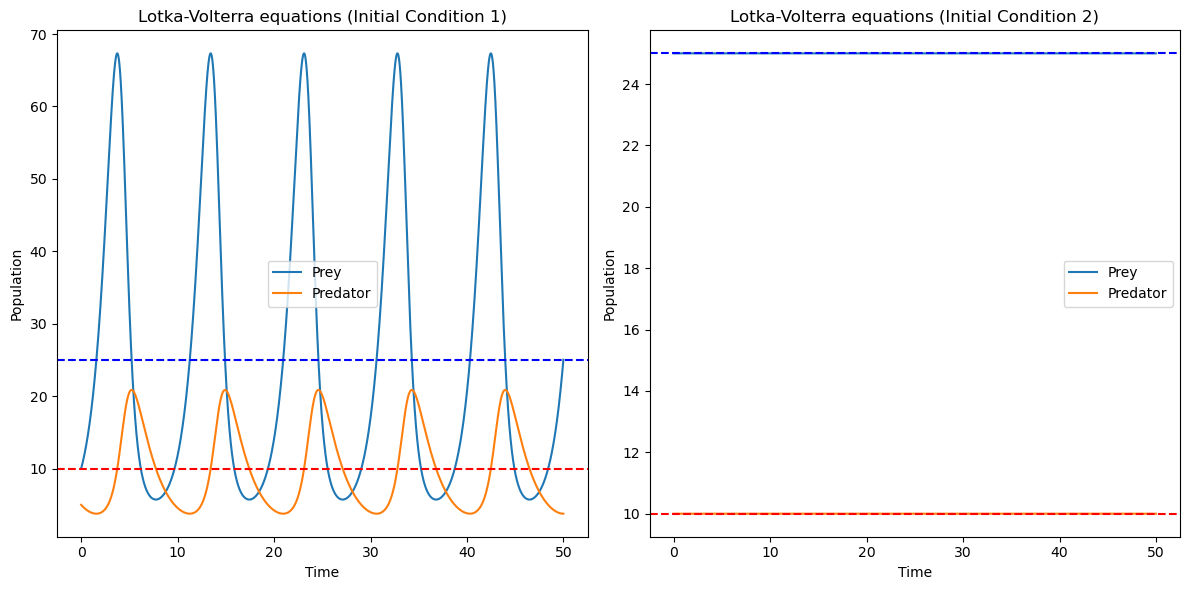

The steady state population of prey (x) is  25.0
The steady state population of predators (y) is  10.0


In [271]:
# Parameters
alpha = 1.0
beta = 0.1
gamma = 0.5
delta = 0.02

# Lotka Volterra equations
def base_lotka_volterra(state, t):
    x, y = state  # unpack the state vector
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return dxdt, dydt

# Initial conditions
initial_conditions = [
    {"name": "Initial Condition 1", "state0": [10, 5]},
    {"name": "Initial Condition 2", "state0": [25, 10]}
]

# Time array
t = np.arange(0.0, 50.0, 0.01)

# Create a new figure
plt.figure(figsize=(12, 6))

# Calculate steady state
x_steady = gamma / delta
y_steady = alpha / beta

# Solve ODE for each initial condition
for i, ic in enumerate(initial_conditions):
    state0 = ic["state0"]
    state = odeint(base_lotka_volterra, state0, t)

    # Create subplot
    plt.subplot(1, len(initial_conditions), i+1)
    plt.plot(t, state[:, 0], label='Prey')
    plt.plot(t, state[:, 1], label='Predator')

    # Add horizontal lines for the steady state populations
    plt.axhline(y=x_steady, color='b', linestyle='--')
    plt.axhline(y=y_steady, color='r', linestyle='--')

    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f'Lotka-Volterra equations ({ic["name"]})')

# Show the figure
plt.tight_layout()
plt.show()

print("The steady state population of prey (x) is ", x_steady)
print("The steady state population of predators (y) is ", y_steady)


## Extended Lotka-Volterra Model

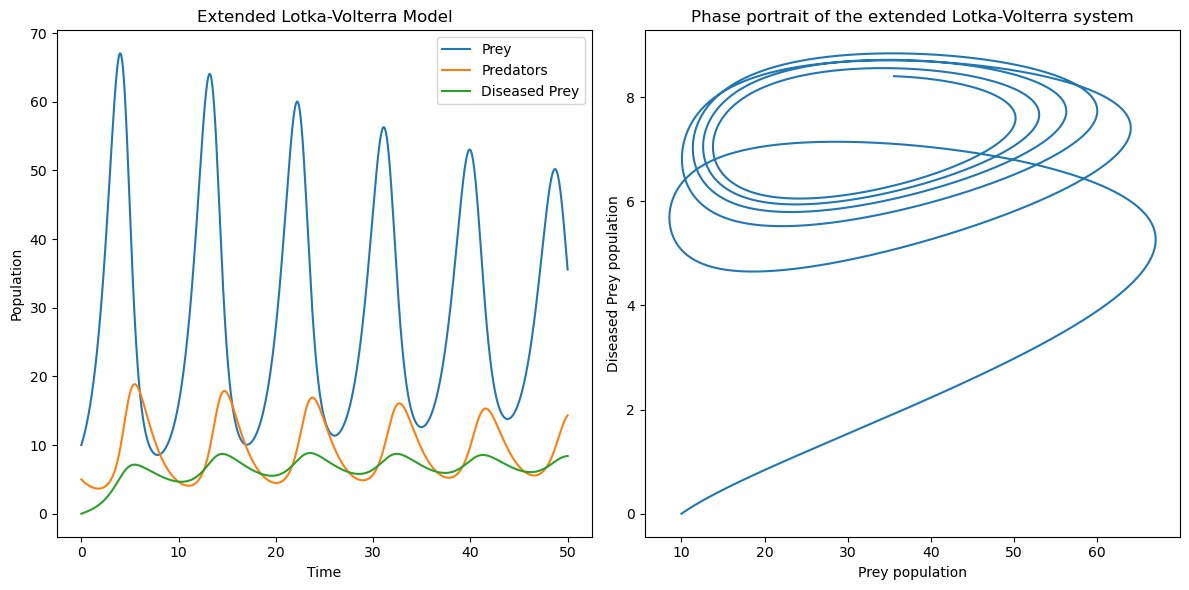

In [309]:
# Parameters
alpha = 1.0
beta = 0.1
gamma = 0.5
delta = 0.02
epsilon = 0.05
eta = 0.2
theta = 0.01

# Extended Lotka-Volterra equations
def extended_lotka_volterra(state, t):
    x, y, z = state  # unpack the state vector
    dxdt = alpha*x - beta*x*y - epsilon*x
    dydt = delta*x*y - gamma*y - theta*y*z
    dzdt = epsilon*x - eta*z
    return dxdt, dydt, dzdt

# Initial conditions
x0 = 10
y0 = 5
z0 = 0
state0 = [x0, y0, z0]

# Time array
t = np.arange(0.0, 50.0, 0.01)

# Solve ODE
state = odeint(extended_lotka_volterra, state0, t)

# Create a new figure
plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(t, state[:, 0], label='Prey')
plt.plot(t, state[:, 1], label='Predators')
plt.plot(t, state[:, 2], label='Diseased Prey')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Extended Lotka-Volterra Model')

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(state[:, 0], state[:, 2])
plt.xlabel('Prey population')
plt.ylabel('Diseased Prey population')
plt.title('Phase portrait of the extended Lotka-Volterra system')

# Show the figure
plt.tight_layout()
plt.show()

## Discrete-Time Analysis (Extended Model)

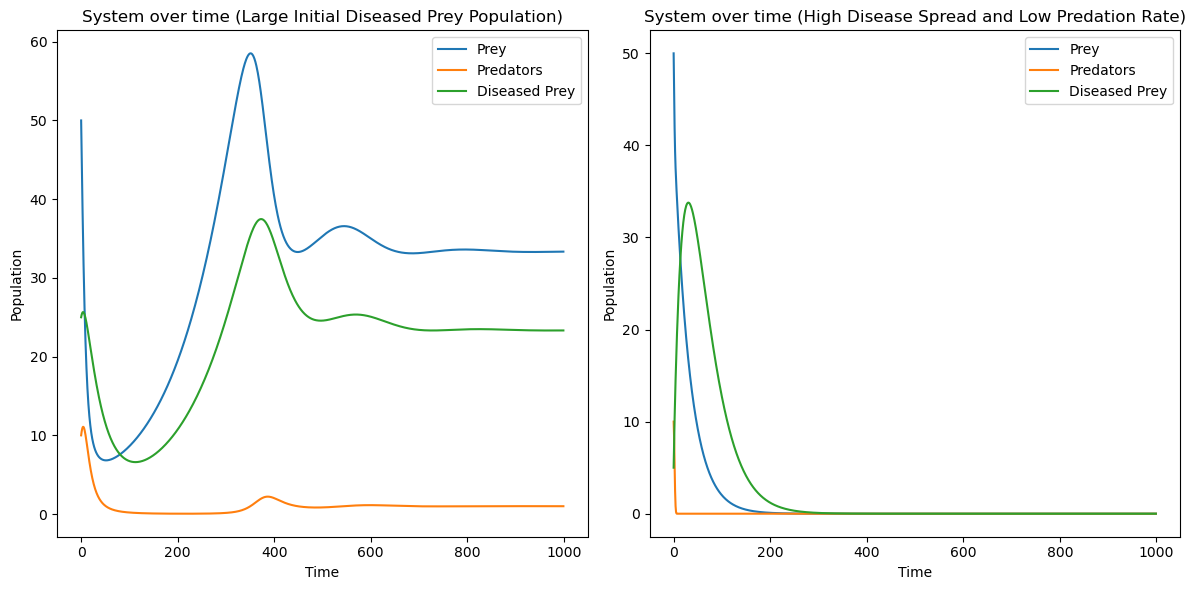

In [298]:
# Set the time step and total time for the simulation
dt = 0.3 # time step
T = 1000  # total time

# Initialize arrays to store the populations at each time step
x = np.zeros(T)  # Prey population
y = np.zeros(T)  # Predator population
z = np.zeros(T)  # Diseased prey population

# Define the scenarios with their parameters and initial conditions
scenarios = [
    {"name": "Large Initial Diseased Prey Population", "params": (0.1, 0.03, 0.01, 0.1, 0.01, 0.07, 0.1), "init_cond": (50, 10, 25)},
    {"name": "High Disease Spread and Low Predation Rate", "params":  (0.1, 0.02, 0.01, 0.1, 0.2, 0.2, 0.1), "init_cond": (50, 10, 5)}
]

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Simulate the system for each scenario
for i, scenario in enumerate(scenarios):
    # Unpack the parameters and initial conditions for this scenario
    α, β, δ, γ, θ, ε, η = scenario["params"]
    x0, y0, z0 = scenario["init_cond"]

    # Set the initial conditions
    x[0], y[0], z[0] = x0, y0, z0

    # Run the simulation
    for t in range(T-1):
        # Update the prey population
        x[t+1] = x[t] + dt*(α*x[t] - β*x[t]*y[t] - ε*x[t])
        # Update the predator population
        y[t+1] = y[t] + dt*(δ*x[t]*y[t] - γ*y[t] - θ*y[t]*z[t])
        # Update the diseased prey population
        z[t+1] = z[t] + dt*(ε*x[t] - η*z[t])

    # Plot the results on the current subplot
    axs[i].plot(x, label='Prey')
    axs[i].plot(y, label='Predators')
    axs[i].plot(z, label='Diseased Prey')
    axs[i].legend()
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Population')
    axs[i].set_title(f'System over time ({scenario["name"]})')

# Adjust the layout so that there is no overlap between subplots
plt.tight_layout()
plt.show()


## Continuous-Time Analysis (Extended Model)

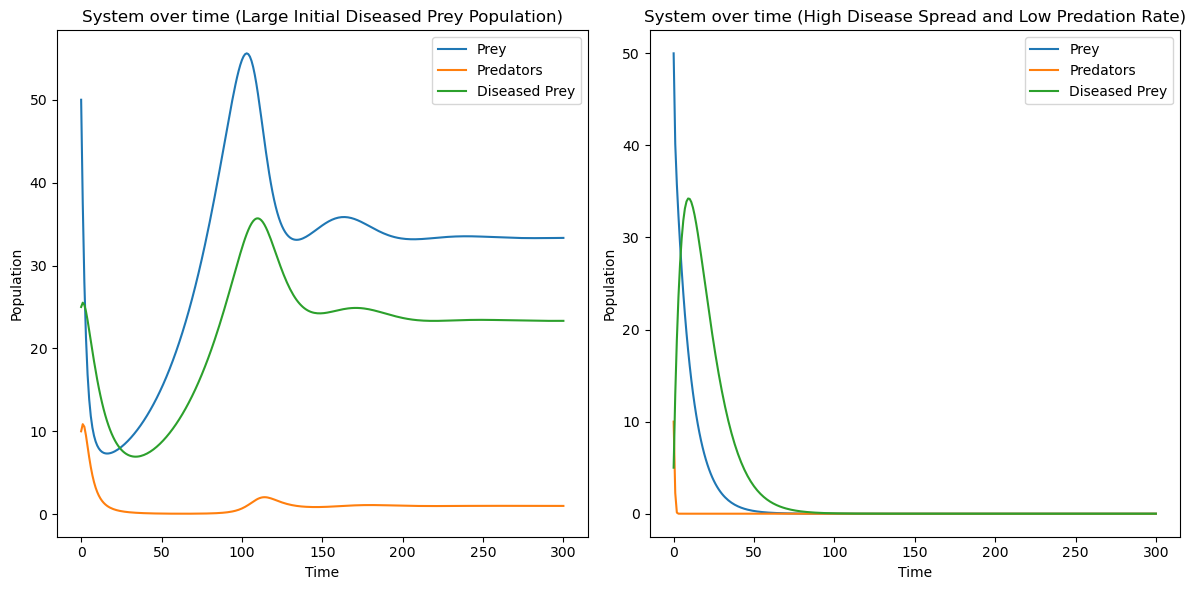

In [300]:
# Time grid
T = 300  # Total time
t = np.linspace(0, T, T+1)  # Create a time grid from 0 to T

# System of differential equations
def system(state, t, α, β, δ, γ, θ, ε, η):
    x, y, z = state  # Unpack the state vector
    # Define the system of equations
    dx = α*x - β*x*y - ε*x
    dy = δ*x*y - γ*y - θ*y*z
    dz = ε*x - η*z
    return [dx, dy, dz]  # Return the derivatives

# Define the scenarios with their parameters and initial conditions
scenarios = [
    {"name": "Large Initial Diseased Prey Population", "params": (0.1, 0.03, 0.01, 0.1, 0.01, 0.07, 0.1), "init_cond": (50, 10, 25)},
    {"name": "High Disease Spread and Low Predation Rate", "params":  (0.1, 0.02, 0.01, 0.1, 0.2, 0.2, 0.1), "init_cond": (50, 10, 5)}
]

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Simulate the system for each scenario
for i, scenario in enumerate(scenarios):
    # Unpack the parameters and initial conditions for this scenario
    α, β, δ, γ, θ, ε, η = scenario["params"]
    x0, y0, z0 = scenario["init_cond"]

    # Solve the system using odeint
    solution = odeint(system, (x0, y0, z0), t, args=(α, β, δ, γ, θ, ε, η))

    # Plot the results on the current subplot
    axs[i].plot(t, solution[:, 0], label='Prey')
    axs[i].plot(t, solution[:, 1], label='Predators')
    axs[i].plot(t, solution[:, 2], label='Diseased Prey')
    axs[i].legend()
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Population')
    axs[i].set_title(f'System over time ({scenario["name"]})')

# Adjust the layout so that there is no overlap between subplots
plt.tight_layout()
plt.show()

## Steady State Analysis for Extended Lotka-Volterra Model

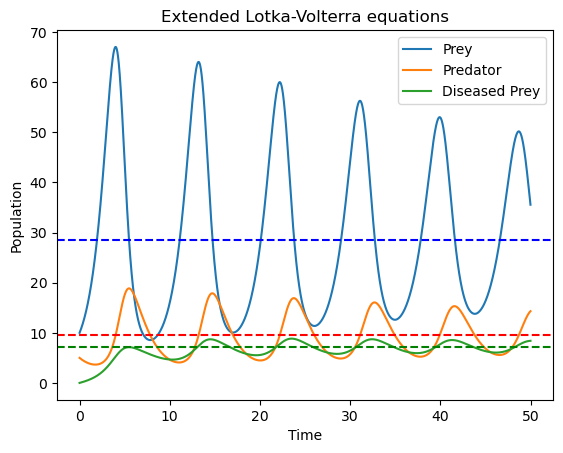

The steady state population of prey (x) is  28.5714285714286
The steady state population of predators (y) is  9.50000000000000
The steady state population of diseased prey (z) is  7.14285714285714
The eigenvalues of the Jacobian at the steady state are {-0.0118226646424035 - 0.733857890328858*I: 1, -0.0118226646424035 + 0.733857890328858*I: 1, -0.176354670715193 + 3.69097324529971e-68*I: 1}


In [305]:
# Parameters
alpha = 1.0
beta = 0.1
gamma = 0.5
delta = 0.02
epsilon = 0.05
eta = 0.2
theta = 0.01

# Extended Lotka-Volterra equations
def extended_lotka_volterra(state, t):
    x, y, z = state  # unpack the state vector
    dxdt = alpha*x - beta*x*y - epsilon*x
    dydt = delta*x*y - gamma*y - theta*y*z 
    dzdt = epsilon*x - eta*z
    return dxdt, dydt, dzdt

# Initial conditions
x0 = 10
y0 = 5
z0 = 0
state0 = [x0, y0, z0]

# Time array
t = np.arange(0.0, 50.0, 0.01)

# Solve ODE
state = odeint(extended_lotka_volterra, state0, t)

# Calculate steady state symbolically
x, y, z = symbols('x y z', real=True, positive=True)
eq1 = Eq(alpha*x - beta*x*y - epsilon*x, 0)
eq2 = Eq(delta*x*y - gamma*y - theta*y*z, 0)
eq3 = Eq(epsilon*x - eta*z, 0)

steady_state_solution = solve((eq1, eq2, eq3), (x, y, z))
x_steady, y_steady, z_steady = steady_state_solution[0]

# Define the Jacobian matrix
J = Matrix([
    [alpha - beta*y - epsilon, -beta*x, 0],
    [delta*y, delta*x - gamma - theta*z, -theta*y],
    [epsilon, 0, -eta]
])

# Substitute the steady state values into the Jacobian
J_steady_state = J.subs({x: x_steady, y: y_steady, z: z_steady})

# Calculate the eigenvalues
eigenvals = J_steady_state.eigenvals()

# Plot
plt.figure()
plt.plot(t, state[:, 0], label='Prey')
plt.plot(t, state[:, 1], label='Predator')
plt.plot(t, state[:, 2], label='Diseased Prey')

# Add horizontal lines for the steady state populations
plt.axhline(y=x_steady, color='b', linestyle='--')
plt.axhline(y=y_steady, color='r', linestyle='--')
plt.axhline(y=z_steady, color='g', linestyle='--')

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Extended Lotka-Volterra equations')
plt.show()

print("The steady state population of prey (x) is ", x_steady)
print("The steady state population of predators (y) is ", y_steady)
print("The steady state population of diseased prey (z) is ", z_steady)
print("The eigenvalues of the Jacobian at the steady state are", eigenvals)

## Game Theory

Final predator strategy distribution: [0.73108054 0.26891946]
Final prey strategy distribution: [0.60837719 0.39162281]
Best strategy for predator: aggressive
Best strategy for prey: hiding
Nash Equilibrium: (array([1., 0.]), array([1., 0.]))


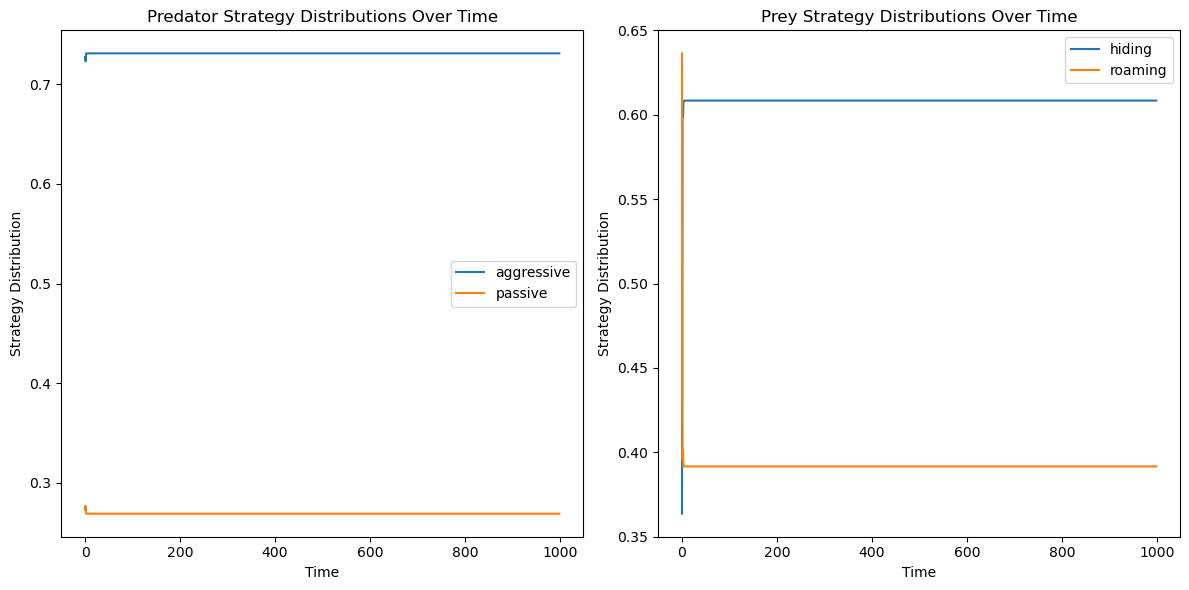

In [315]:
# Parameters
alpha = 1.0
beta = 0.1
gamma = 0.5
delta = 0.02
epsilon = 0.05
eta = 0.2
theta = 0.01

# Initial conditions
x0 = 10
y0 = 5
z0 = 0
state0 = [x0, y0, z0]

T = 1000  # Total time
dt = 0.5 

# Define the strategies
predator_strategies = ['aggressive', 'passive']
prey_strategies = ['hiding', 'roaming']

# Define the payoff matrix
payoff_matrix = np.array([[[3, -3], [5, -5]], [[1, -1], [2, -2]]])

# Initialize the strategy distributions
predator_distribution = np.array([0.5, 0.5])
prey_distribution = np.array([0.5, 0.5])

# Initialize the populations
x = x0
y = y0
z = z0

# Initialize arrays to store the strategy distributions at each time step
predator_distributions = np.zeros((T, len(predator_strategies)))
prey_distributions = np.zeros((T, len(prey_strategies)))

# Run the game and store the strategy distributions at each time step
for t in range(T):
    # Calculate the expected payoffs for each strategy
    predator_payoffs = np.sum(payoff_matrix[:, :, 0] * prey_distribution, axis=1)
    prey_payoffs = np.sum(payoff_matrix[:, :, 1] * predator_distribution, axis=0)

    # Update the strategy distributions based on the expected payoffs
    predator_distribution = predator_payoffs / np.sum(predator_payoffs)
    prey_distribution = prey_payoffs / np.sum(prey_payoffs)

    # Store the strategy distributions
    predator_distributions[t, :] = predator_distribution
    prey_distributions[t, :] = prey_distribution

    # Update the populations based on the chosen strategies and the simulation equations
    x_next = x + dt * (alpha*x - beta*x*y - epsilon*x)
    y_next = y + dt * (delta*x*y - gamma*y - theta*y*z)
    z_next = z + dt * (epsilon*x - eta*z)

    x, y, z = x_next, y_next, z_next

# Print the final strategy distributions
print('Final predator strategy distribution:', predator_distribution)
print('Final prey strategy distribution:', prey_distribution)

# Identify the best strategy for each player
best_predator_strategy = predator_strategies[np.argmax(predator_distribution)]
best_prey_strategy = prey_strategies[np.argmax(prey_distribution)]

print('Best strategy for predator:', best_predator_strategy)
print('Best strategy for prey:', best_prey_strategy)

# Calculate Nash Equilibrium using nashpy
game = nash.Game(payoff_matrix[:,:,0], payoff_matrix[:,:,1])
equilibria = game.support_enumeration()
for eq in equilibria:
    print('Nash Equilibrium:', eq)

# Create a new figure
plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
for i, strategy in enumerate(predator_strategies):
    plt.plot(np.arange(T), predator_distributions[:, i], label=strategy)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Strategy Distribution')
plt.title('Predator Strategy Distributions Over Time')

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
for i, strategy in enumerate(prey_strategies):
    plt.plot(np.arange(T), prey_distributions[:, i], label=strategy)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Strategy Distribution')
plt.title('Prey Strategy Distributions Over Time')

# Show the figure
plt.tight_layout()
plt.show()

## Monte Carlo Simulation

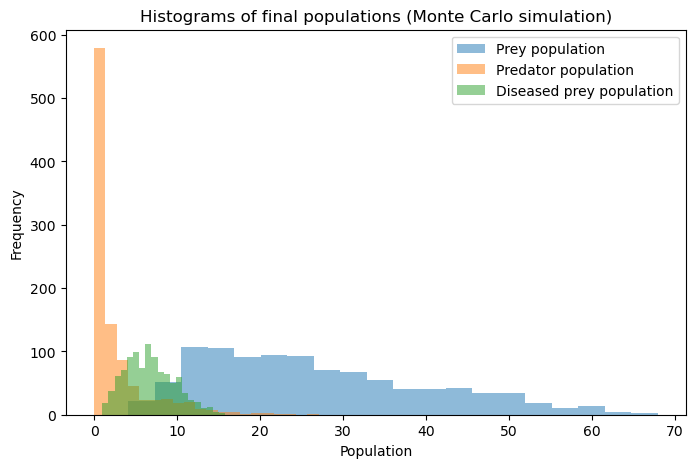

In [313]:
# Number of simulation runs
N = 1000

# Time step and number of steps
dt = 0.01
T = 5000

# Initial conditions
x0 = 40
y0 = 9
z0 = 0

# Lists to store the final populations for each run
final_prey_pop = []
final_predator_pop = []
final_diseased_prey_pop = []

for i in range(N):
    # Draw the parameters from a uniform distribution
    alpha = np.random.uniform(0.05, 0.15)
    beta = np.random.uniform(0.01, 0.03)
    gamma = np.random.uniform(0.4, 0.6)
    delta = np.random.uniform(0.015, 0.025)
    epsilon = 0.05
    eta = 0.2
    theta = 0.01

    # Initial populations
    x = x0
    y = y0
    z = z0

    # Run the simulation
    for t in range(T):
        x_next = x + dt * (alpha*x - beta*x*y - epsilon*x)
        y_next = y + dt * (delta*x*y - gamma*y - theta*y*z)
        z_next = z + dt * (epsilon*x - eta*z)

        x, y, z = x_next, y_next, z_next

    # Store the final populations
    final_prey_pop.append(x)
    final_predator_pop.append(y)
    final_diseased_prey_pop.append(z)

# Plot histograms of the final populations
plt.figure(figsize=(8, 5))
plt.hist(final_prey_pop, bins=20, alpha=0.5, label='Prey population')
plt.hist(final_predator_pop, bins=20, alpha=0.5, label='Predator population')
plt.hist(final_diseased_prey_pop, bins=20, alpha=0.5, label='Diseased prey population')
plt.legend(loc='best')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histograms of final populations (Monte Carlo simulation)')
plt.show()

## Stochastic Base model (Gillespie)


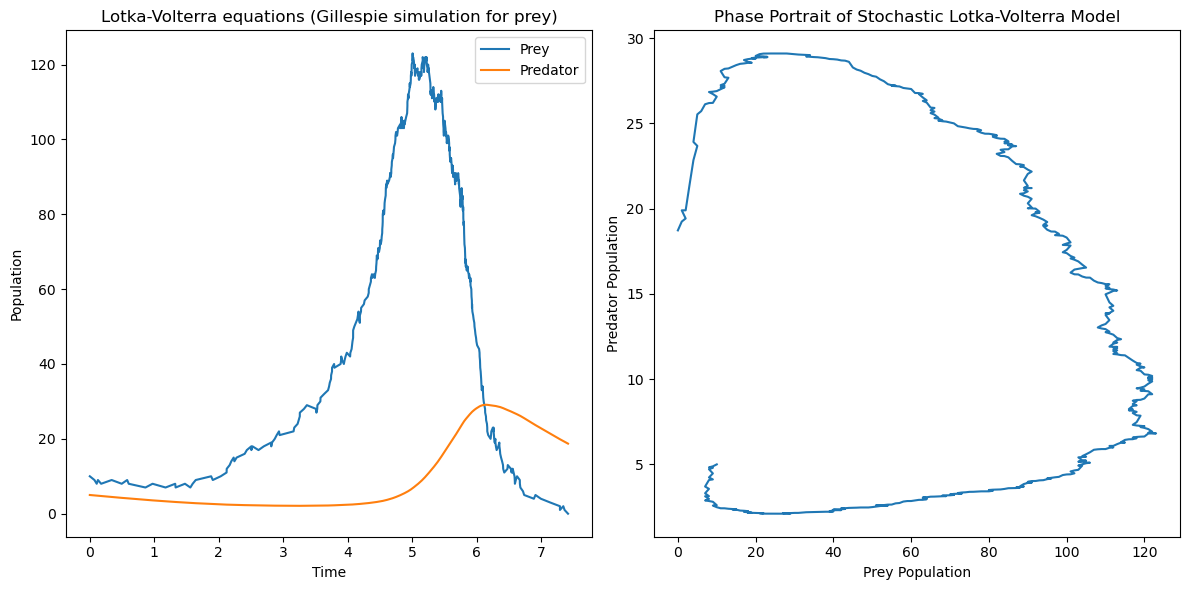

In [311]:
# Parameters for the model: birth rate of prey, death rate of prey due to predation,
# natural death rate of predators, and factor describing how many eaten prey lead to a new predator
alpha = 1.0
beta = 0.1
gamma = 0.5
delta = 0.02

# Initial populations of prey (x) and predators (y)
x = 10
y = 5

# Lists to store the populations of prey and predators at each time step
results_x = [x]
results_y = [y]
results_t = [0]  # List to store the time steps

t = 0  # Initial time
while t < 50:  # Run the simulation until t=50
    # Calculate the propensities of the reactions: birth and death of prey
    a = [alpha*x, beta*x*y]
    a0 = sum(a)  # Total propensity

    # If no reactions are possible (because one of the populations is zero), stop the simulation
    if a0 == 0:
        break

    # Draw the time to the next reaction from an exponential distribution
    r = np.random.uniform(0, 1)
    tau = -np.log(r) / a0
    t += tau  # Update the time

    # Decide which reaction happens next: birth or death of prey
    r = np.random.uniform(0, 1) * a0
    if r < a[0]:
        # Birth of prey
        x += 1
    else:
        # Death of prey
        x -= 1

    # The predator population changes deterministically
    y_new = y + (delta*x*y - gamma*y) * tau
    y = max(y_new, 0)  # Ensure the population doesn't go below zero

    # Save the populations at this time step
    results_t.append(t)
    results_x.append(x)
    results_y.append(y)

# Create a new figure
plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(results_t, results_x, label='Prey')
plt.plot(results_t, results_y, label='Predator')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra equations (Gillespie simulation for prey)')

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(results_x, results_y)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of Stochastic Lotka-Volterra Model')

# Show the figure
plt.tight_layout()
plt.show()

## Stochastic Extended model (Gillespie)

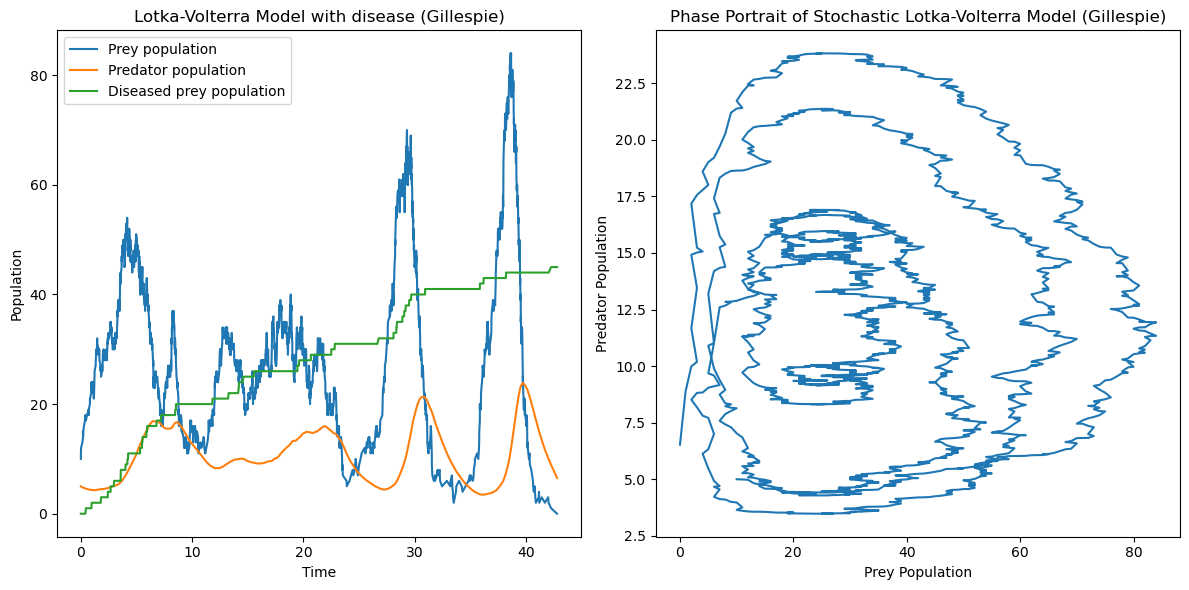

In [261]:
# Parameters for the model: birth rate of prey, death rate of prey due to predation,
# natural death rate of predators, factor describing how many eaten prey lead to a new predator,
# and rate at which healthy prey become infected
alpha = 1.0
beta = 0.1
gamma = 0.5
delta = 0.02
epsilon = 0.05

# Initial populations of prey (x), predators (y), and diseased prey (z)
x = 10
y = 5
z = 0

# Lists to store the populations of prey, predators, and diseased prey at each time step
results_x = [x]
results_y = [y]
results_z = [z]
results_t = [0]  # List to store the time steps

t = 0  # Initial time
while t < 50:  # Run the simulation until t=50
    # Calculate the propensities of the reactions: birth and death of prey, and disease transmission
    a = [alpha*x, beta*x*y, epsilon*x]
    a0 = sum(a)  # Total propensity

    # If no reactions are possible (because one of the populations is zero), stop the simulation
    if a0 == 0:
        break

    # Draw the time to the next reaction from an exponential distribution
    r = np.random.uniform(0, 1)
    tau = -np.log(r) / a0
    t += tau  # Update the time

    # Decide which reaction happens next: birth of prey, death of prey, or disease transmission
    r = np.random.uniform(0, 1) * a0
    if r < a[0]:
        # Birth of prey
        x += 1
    elif r < a[0] + a[1]:
        # Death of prey
        x -= 1
    else:
        # Disease transmission
        x -= 1
        z += 1

    # The predator population changes deterministically
    y_new = y + (delta*x*y - gamma*y) * tau
    y = max(y_new, 0)  # Ensure the population doesn't go below zero

    # Save the populations at this time step
    results_t.append(t)
    results_x.append(x)
    results_y.append(y)
    results_z.append(z)

# Create a new figure
plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(results_t, results_x, label='Prey population')
plt.plot(results_t, results_y, label='Predator population')
plt.plot(results_t, results_z, label='Diseased prey population')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Model with disease (Gillespie)')

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(results_x, results_y)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of Stochastic Lotka-Volterra Model (Gillespie)')

# Show the figure
plt.tight_layout()
plt.show()
